In [1]:
import numpy as np
import time
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import matplotlib.cm as cmx
from sklearn.decomposition import PCA as sk_PCA
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [2]:
cvae_embeddings = np.load('/gpfs/alpine/gen150/scratch/arjun2612/ORNL_Coding/Code/sars_mers_cov2_dataset/cvae/sars-mers-cov2-embeddings.npy', 'r')
cvae_samples = np.load('/gpfs/alpine/gen150/scratch/arjun2612/ORNL_Coding/Code/sars_mers_cov2_dataset/cvae/sars-mers-cov2-samples.npz', 'r')

npzfile1 = np.load('/gpfs/alpine/gen150/scratch/arjun2612/ORNL_Coding/Code/pca/smc2_plotting.npz')
npzfile2 = np.load('/gpfs/alpine/gen150/scratch/arjun2612/ORNL_Coding/Code/pca/smc2_sk_clusterfiles.npz')

smc2_label_validation = npzfile1['labval']
smc2_reduced_val = npzfile2['redval']

cvae_embeddings = np.squeeze(cvae_embeddings)[0:len(smc2_label_validation)]

In [ ]:
pca = sk_PCA(n_components=2)  # 2 PCs
cvae_embeddings = normalize(cvae_embeddings, axis=1, norm='l1')
cvae_embeddings = pca.fit_transform(cvae_embeddings)

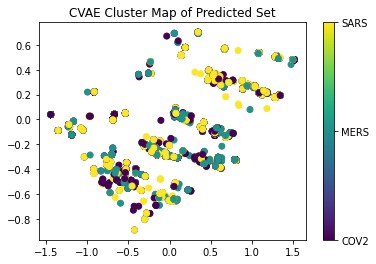

In [3]:
cNorm = matplotlib.colors.Normalize(vmin=min(smc2_label_validation), vmax=max(smc2_label_validation))
scalarMap = cmx.ScalarMappable(norm=cNorm)
fig = plt.figure(9)
plt.scatter(cvae_embeddings[:, 0], cvae_embeddings[:, 1], c=scalarMap.to_rgba(smc2_label_validation))
scalarMap.set_array(smc2_label_validation)
cbar = fig.colorbar(scalarMap)
cbar.set_ticks([0,1,2])
cbar.set_ticklabels(["COV2", "MERS", "SARS"])
plt.title('CVAE Cluster Map of Predicted Set')
plt.show()

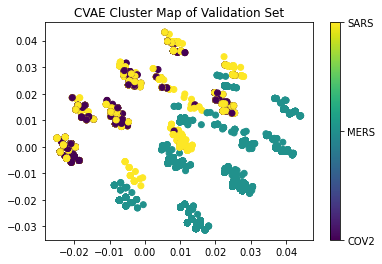

In [4]:
cNorm = matplotlib.colors.Normalize(vmin=min(smc2_label_validation), vmax=max(smc2_label_validation))
scalarMap = cmx.ScalarMappable(norm=cNorm)
fig = plt.figure(10)
plt.scatter(smc2_reduced_val[:, 0], smc2_reduced_val[:, 1], c=scalarMap.to_rgba(smc2_label_validation))
scalarMap.set_array(smc2_label_validation)
cbar = fig.colorbar(scalarMap)
cbar.set_ticks([0,1,2])
cbar.set_ticklabels(["COV2", "MERS", "SARS"])
plt.title('CVAE Cluster Map of Validation Set')
plt.show()

In [5]:
cvae_embeddings = np.squeeze(cvae_embeddings)
smc2_reduced_val = np.squeeze(smc2_reduced_val)
print("embedded shape:", cvae_embeddings.shape)
print("embedded shape:", smc2_reduced_val.shape)

X1 = cvae_embeddings[::1] 
Y1 = smc2_reduced_val[::1]
X_embedded = TSNE(n_components=2).fit_transform(X1)
Y_embedded = TSNE(n_components=2).fit_transform(Y1)
print("after TSNE operation: embedded shape", X_embedded.shape)  
print("after TSNE operation: embedded shape", Y_embedded.shape)  

# np.savez("encoded_TSNE_2D.npz", x_emb=X_embedded, y_emb=Y_embedded)
#lab_eng = args.le
#label_eng = np.load(lab_eng)
#label_eng = np.squeeze(label_eng)
smc2_label_validation = np.squeeze(smc2_label_validation)

#print("label shape:", label_eng.shape)
#tsne_plot(X_embedded, label_eng, "VAE_ENG")

embedded shape: (15000, 7)
embedded shape: (15000, 2)
after TSNE operation: embedded shape (15000, 2)
after TSNE operation: embedded shape (15000, 2)


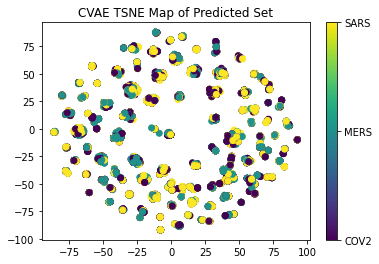

In [9]:
cNorm = matplotlib.colors.Normalize(vmin=min(smc2_label_validation), vmax=max(smc2_label_validation))
scalarMap = cmx.ScalarMappable(norm=cNorm)
fig = plt.figure(1)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=scalarMap.to_rgba(smc2_label_validation)) 
scalarMap.set_array(smc2_label_validation)
cbar = fig.colorbar(scalarMap)
cbar.set_ticks([0,1,2])
cbar.set_ticklabels(["COV2", "MERS", "SARS"])
plt.title("CVAE TSNE Map of Predicted Set")
# plt.savefig("cvae_predicted_cluster_map")
plt.show()

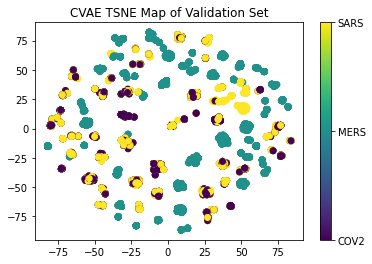

In [10]:
cNorm = matplotlib.colors.Normalize(vmin=min(smc2_label_validation), vmax=max(smc2_label_validation))
scalarMap = cmx.ScalarMappable(norm=cNorm)
fig = plt.figure(2)
plt.scatter(Y_embedded[:,0], Y_embedded[:,1], c=scalarMap.to_rgba(smc2_label_validation)) 
scalarMap.set_array(smc2_label_validation)
cbar = fig.colorbar(scalarMap)
cbar.set_ticks([0,1,2])
cbar.set_ticklabels(["COV2", "MERS", "SARS"])
plt.title("CVAE TSNE Map of Validation Set")
# plt.savefig("cvae_validation_cluster_map")
plt.show()